# CALFEWS: California Food-Energy-Water System simulation model

This notebook will rerun all simulations and recreate all figures from the following manuscript:

Zeff, H.B., Herman, J.D., Hamilton, A.L., Malek, K., Cohen, J.S., Medellin-Azuara, J., Reed, P.M., and G.W. Characklis. (2020). "Paper title." *Journal Name*. (In preparation).

Prior to running this notebook, follow the instructions in "README.md" to download the model and data, and install all Python dependencies.

## Run validation 

Make sure you do not already have a folder "results/baseline_wy2017" from a previous run. If so, you will get an error.

#### Override parameter file with version in "runtime_params_validation.ini"

In [1]:
! cp runtime_params_validation.ini runtime_params.ini

#### Run model. This will take ~15 minutes.

In [2]:
! python3 -W ignore main.py

0
1
validation
#######################################################
Sample 0 start
Initialization complete,  0:00:29.342007
Year  1.0 ,  0:01:18.660543
Year  2.0 ,  0:02:08.630031
Year  3.0 ,  0:02:52.341483
Year  4.0 ,  0:03:35.579074
Year  5.0 ,  0:04:16.634381
Year  6.0 ,  0:04:56.580000
Year  7.0 ,  0:05:35.592126
Year  8.0 ,  0:06:18.048042
Year  9.0 ,  0:07:10.643690
Year  10.0 ,  0:08:07.571855
Year  11.0 ,  0:08:53.133453
Year  12.0 ,  0:09:41.029276
Year  13.0 ,  0:10:28.570520
Year  14.0 ,  0:11:16.402829
Year  15.0 ,  0:12:14.734583
Year  16.0 ,  0:13:03.913854
Year  17.0 ,  0:13:46.154251
Year  18.0 ,  0:14:26.537848
Year  19.0 ,  0:15:08.177517
Year  20.0 ,  0:15:54.967887
Sample 19962016 completed in  0:16:01.806118
Total run completed in  0:16:01.806176


## Run simulation 
#### Now change to simulation mode and rerun. This will take ~1.5 hours.

In [3]:
! sed -i 's+\"validation\"+\"simulation\"+' runtime_params.ini
! python3 -W ignore main.py

0
1
simulation
#######################################################
Sample 0 start
Initialization complete,  0:01:41.587705
Year  1.0 ,  0:02:52.887589
Year  2.0 ,  0:03:45.848635
Year  3.0 ,  0:04:32.086396
Year  4.0 ,  0:05:22.556650
Year  5.0 ,  0:06:17.009209
Year  6.0 ,  0:07:15.043881
Year  7.0 ,  0:08:06.510759
Year  8.0 ,  0:08:52.517919
Year  9.0 ,  0:09:54.155902
Year  10.0 ,  0:10:44.968064
Year  11.0 ,  0:11:43.224455
Year  12.0 ,  0:12:35.551029
Year  13.0 ,  0:13:25.364191
Year  14.0 ,  0:14:18.682162
Year  15.0 ,  0:15:18.031236
Year  16.0 ,  0:16:12.977555
Year  17.0 ,  0:17:04.870125
Year  18.0 ,  0:18:05.133466
Year  19.0 ,  0:18:53.151294
Year  20.0 ,  0:19:42.417692
Year  21.0 ,  0:20:30.682427
Year  22.0 ,  0:21:24.558795
Year  23.0 ,  0:22:13.346796
Year  24.0 ,  0:23:00.855937
Year  25.0 ,  0:23:49.774790
Year  26.0 ,  0:24:35.147221
Year  27.0 ,  0:25:26.471157
Year  28.0 ,  0:26:12.316213
Year  29.0 ,  0:27:03.801996
Year  30.0 ,  0:27:59.308688
Year  31.0 ,

## Analyze & visualize data. This may take a couple of hours.

In [2]:
import numpy as np
import pandas as pd
import h5py
import json
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import compress
import os
from cord import *
from cord.visualizer import Visualizer
from datetime import datetime

startTime = datetime.now()

In [6]:
#results hdf5 file location from CALFEWS simulations
output_folder_val = 'results/baseline_wy2017/validation/p0/'
output_folder_sim = 'results/baseline_wy2017/simulation/p0/'
output_file_val = output_folder_val + 'results_p19962016.hdf5'
output_file_sim = output_folder_sim + 'results_p19062016.hdf5'
##get model variable names
modelno_val = pd.read_pickle(output_folder_val + 'modelno0.pkl')
modelno_sim = pd.read_pickle(output_folder_sim + 'modelno0.pkl')
modelso_val = pd.read_pickle(output_folder_val + 'modelso0.pkl')
modelso_sim = pd.read_pickle(output_folder_sim + 'modelso0.pkl')

##Folder to write visualization files
fig_folder = 'results/baseline_wy2017/figures/'
sankeys_folder = 'results/baseline_wy2017/sankeys/'
os.makedirs(fig_folder, exist_ok=True)
os.makedirs(sankeys_folder, exist_ok=True)

##plot figures in python
show_plot = True
##Set up data for validation results
validation = Visualizer(modelso_val.district_list, modelso_val.private_list, modelso_val.city_list, modelso_val.contract_list, modelso_val.waterbank_list, modelso_val.leiu_list)
validation.get_results_sensitivity_number(output_file_val, 19962016, 10, 1996, 1)
validation.set_figure_params()
#Set up data for scenario results
simulation = Visualizer(modelso_sim.district_list, modelso_sim.private_list, modelso_sim.city_list, modelso_sim.contract_list, modelso_sim.waterbank_list, modelso_sim.leiu_list)
simulation.get_results_sensitivity_number(output_file_sim, 19062016, 10, 1905, 1)
simulation.set_figure_params()

Scenario Comp


findfont: Font family ['Gill Sans MT'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gill Sans MT'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gill Sans MT'] not found. Falling back to DejaVu Sans.


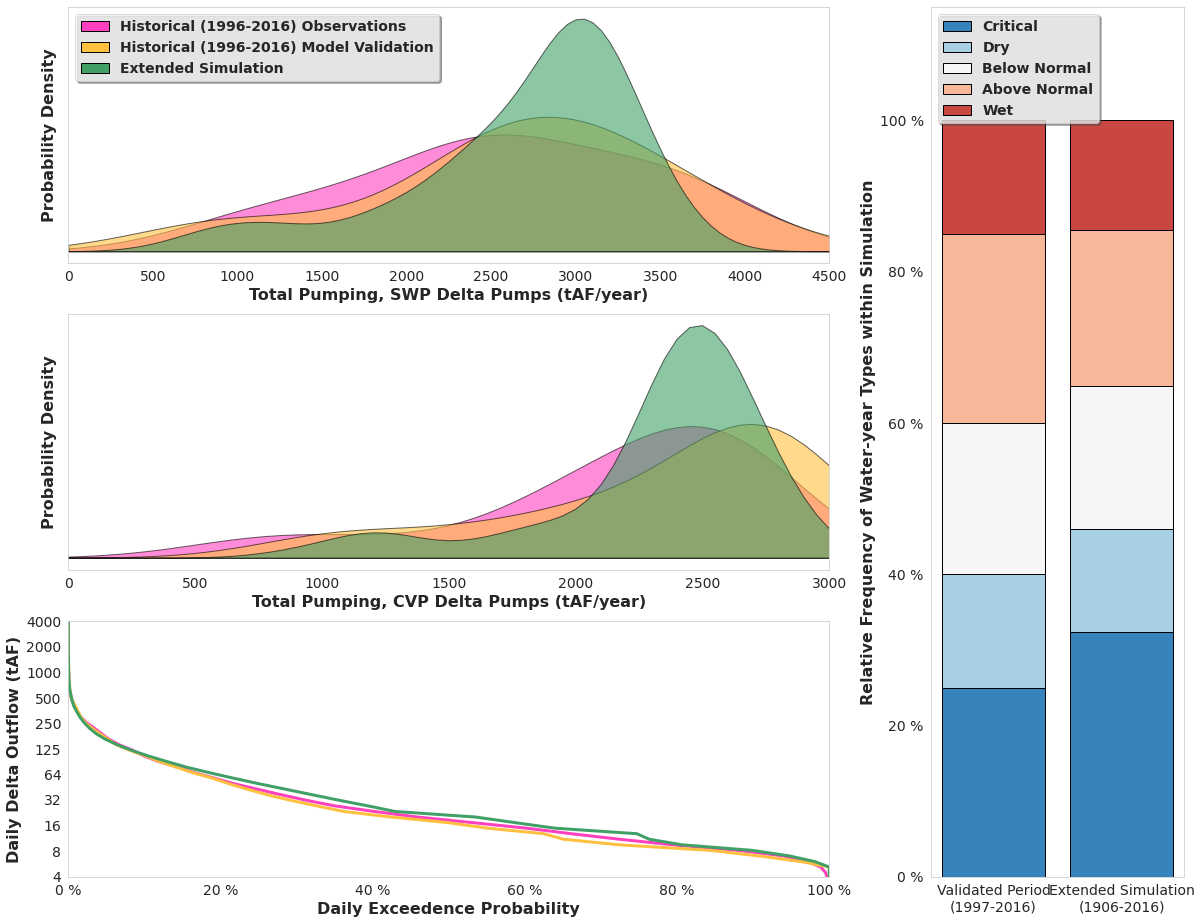

Time elapsed:  0:03:33.247633


In [5]:
##Compare Delta pumping/outflow distributions between scenarios
print('Scenario Comp')
plot_type = 'delta_pumping'
plot_name = 'extended_simulation'
simulation.scenario_compare(fig_folder, plot_type, plot_name, validation.values, show_plot)

print('Time elapsed: ', datetime.now() - startTime)

Deliveries physical


findfont: Font family ['Gill Sans MT'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gill Sans MT'] not found. Falling back to DejaVu Sans.


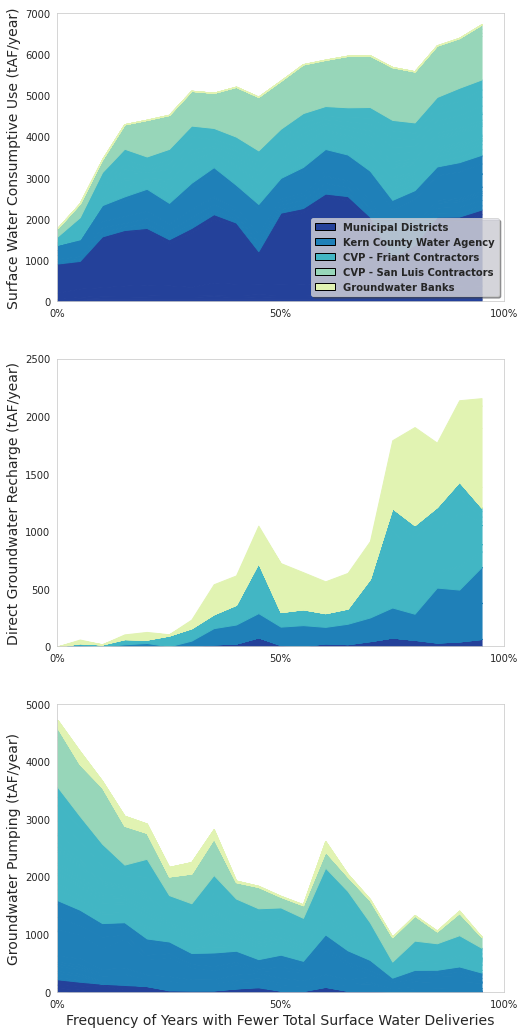

findfont: Font family ['Gill Sans MT'] not found. Falling back to DejaVu Sans.


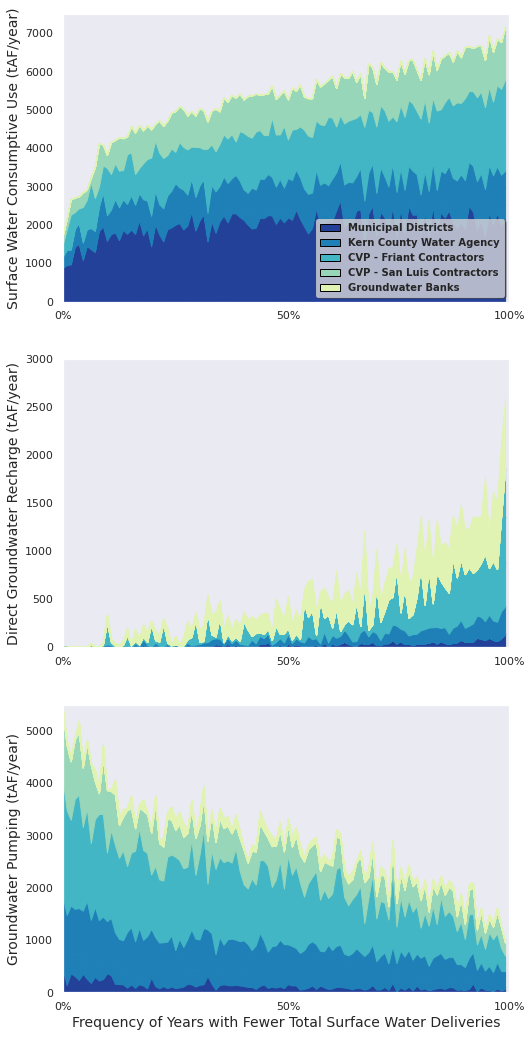

Deliveries account


findfont: Font family ['Gill Sans MT'] not found. Falling back to DejaVu Sans.


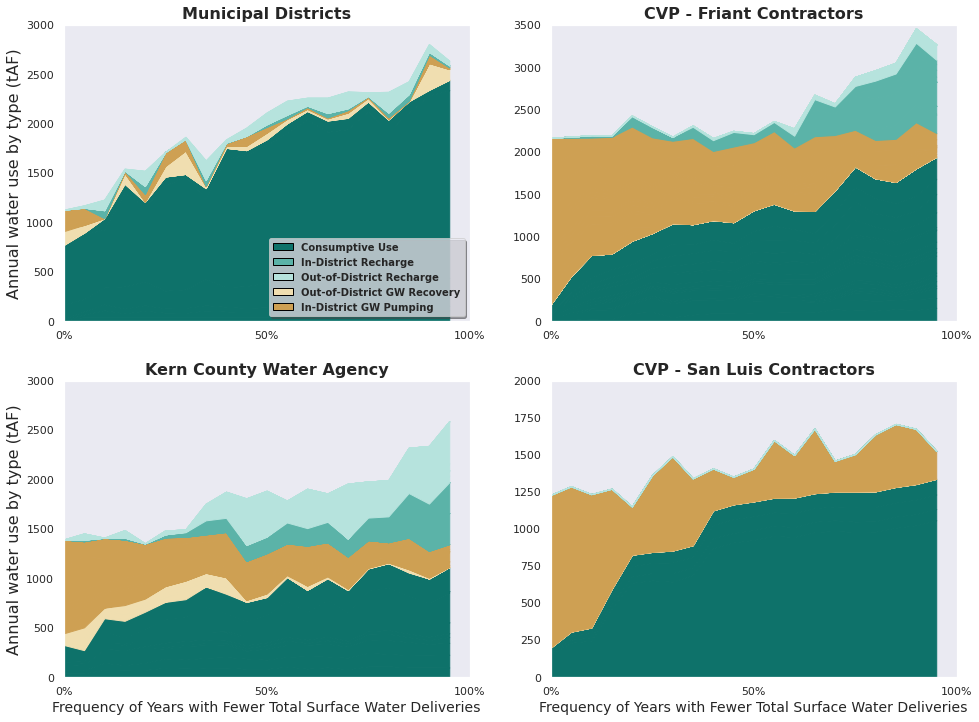

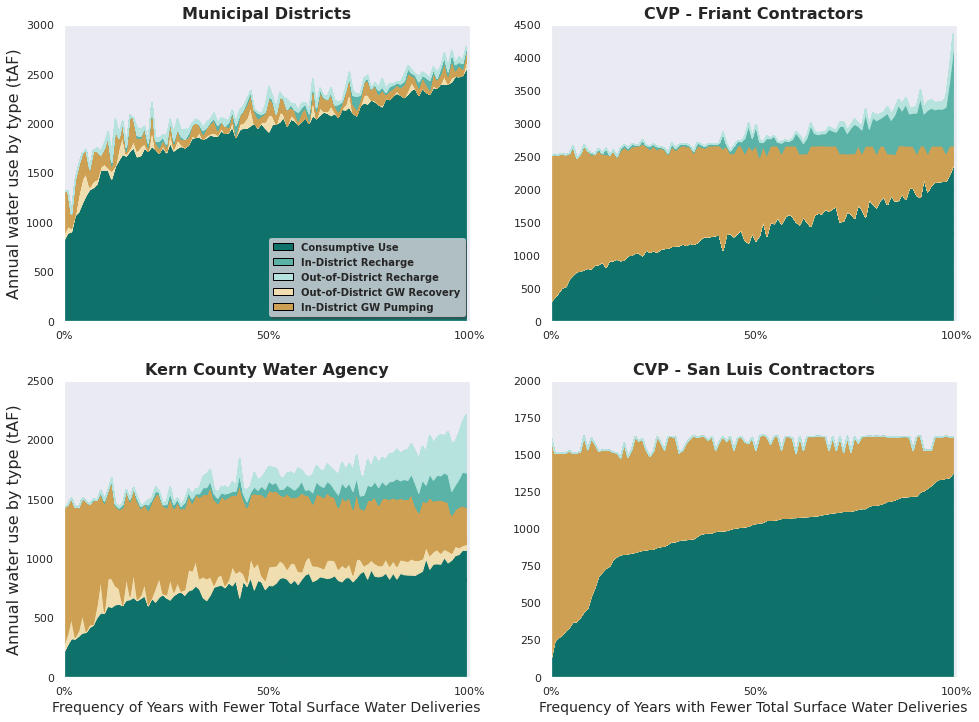

Time elapsed:  0:08:26.992747


In [7]:
#Plot district deliveries - both the physical location (for links w/GW and PMP modelling) and the 'account' - for financial risk
plot_type = 'district_water_use'
water_use_plots = ['physical', 'account']
for plot_name in water_use_plots:
  print('Deliveries ' + plot_name)
  ##Uses the 'scenario' files
  #simulation.make_deliveries_by_district(fig_folder, plot_type, plot_name, show_plot)
  validation.make_deliveries_by_district(fig_folder, plot_type, plot_name, '19972016', show_plot)
  simulation.make_deliveries_by_district(fig_folder, plot_type, plot_name, '19062016', show_plot)
print('Time elapsed: ', datetime.now() - startTime)

Forcasts publication


findfont: Font family ['Gill Sans MT'] not found. Falling back to DejaVu Sans.


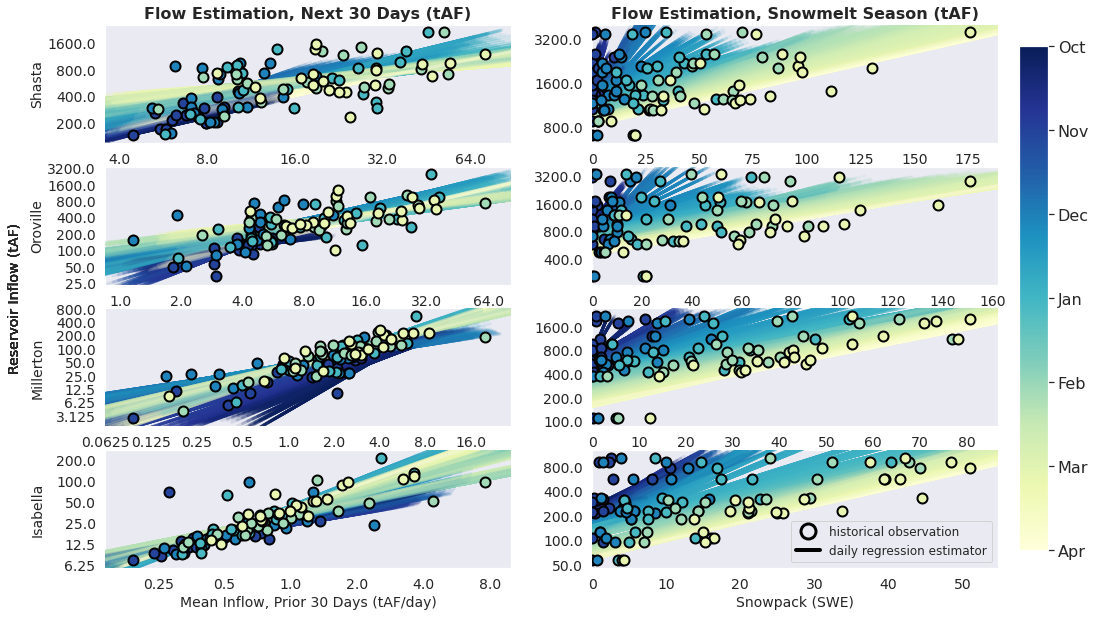

Forcasts sacramento


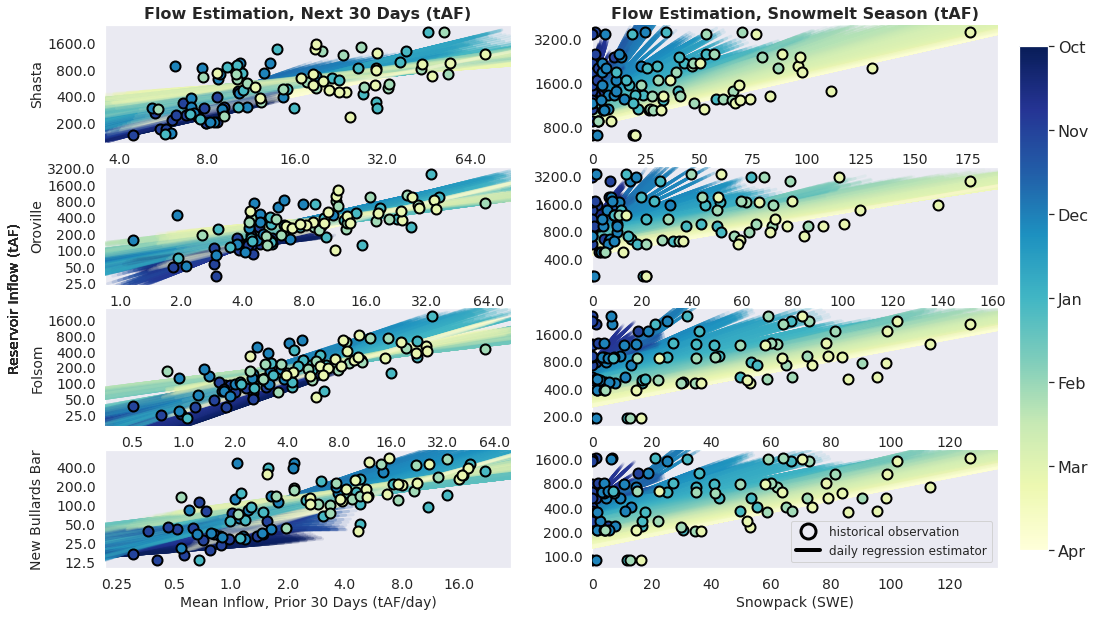

Forcasts sanjoaquin


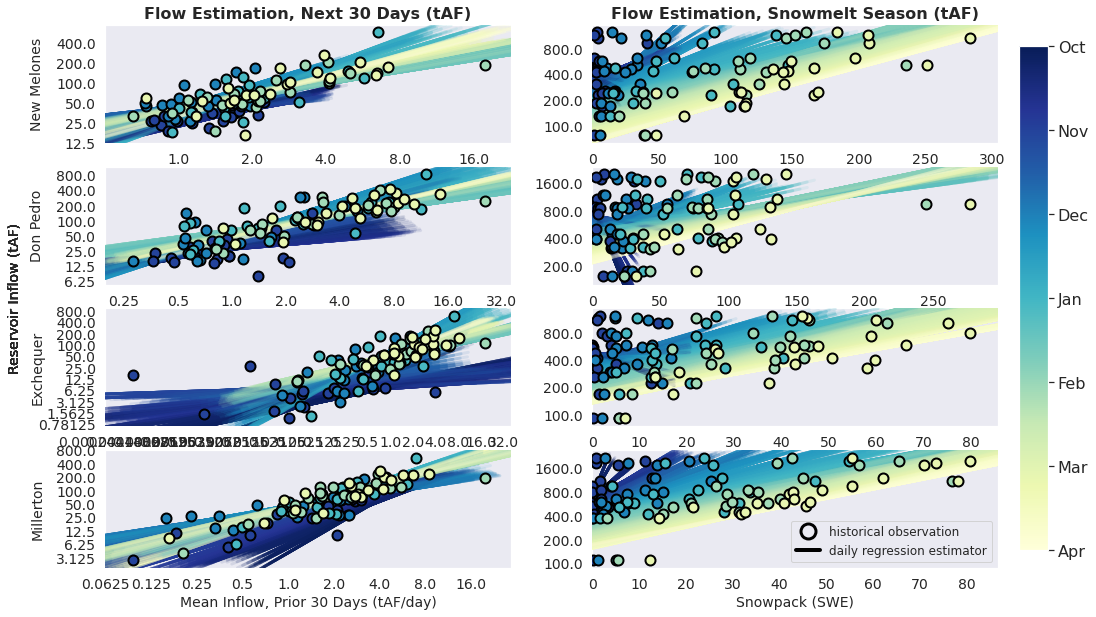

Forcasts tulare


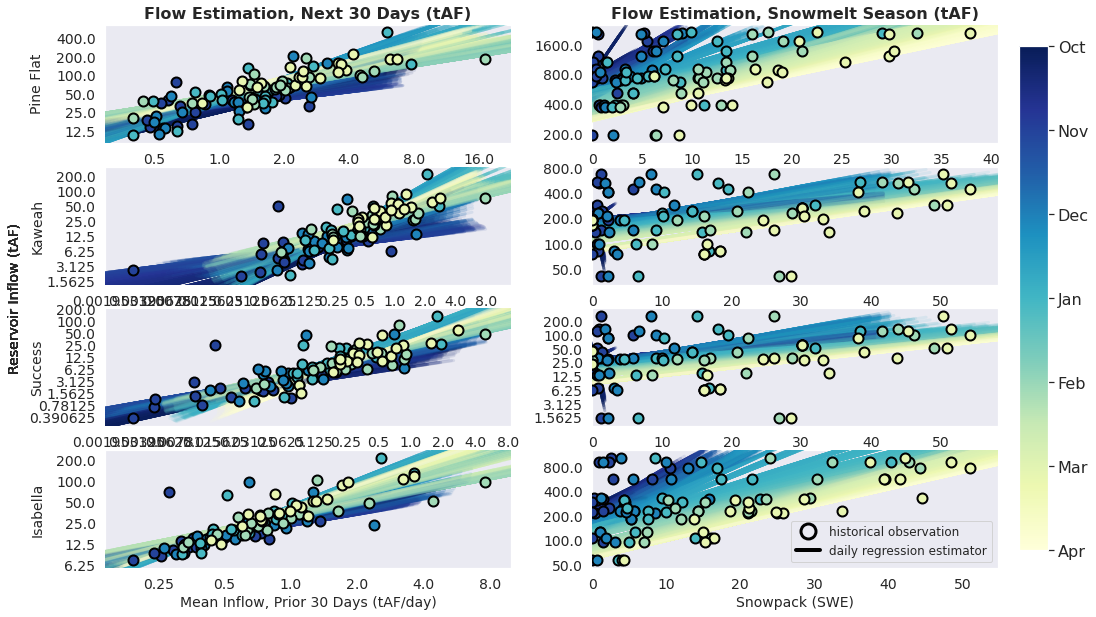

Time elapsed:  0:17:38.289934


In [8]:
##Plot snowpack/flow relationships for different watersheds
plot_type = 'state_estimation'
forecast_plots = ['publication', 'sacramento', 'sanjoaquin', 'tulare']
n_days_colorbar = 180
scatter_plot_interval = 30
range_sensitivity = 5.0 # higher number limits range of regression function plotting closer to the range of the data
for plot_name in forecast_plots:
  print('Forcasts ' + plot_name)
  validation.plot_forecasts(fig_folder, plot_type, plot_name, n_days_colorbar, scatter_plot_interval, range_sensitivity, show_plot)
print('Time elapsed: ', datetime.now() - startTime)

State Response, WRM


findfont: Font family ['Gill Sans MT'] not found. Falling back to DejaVu Sans.


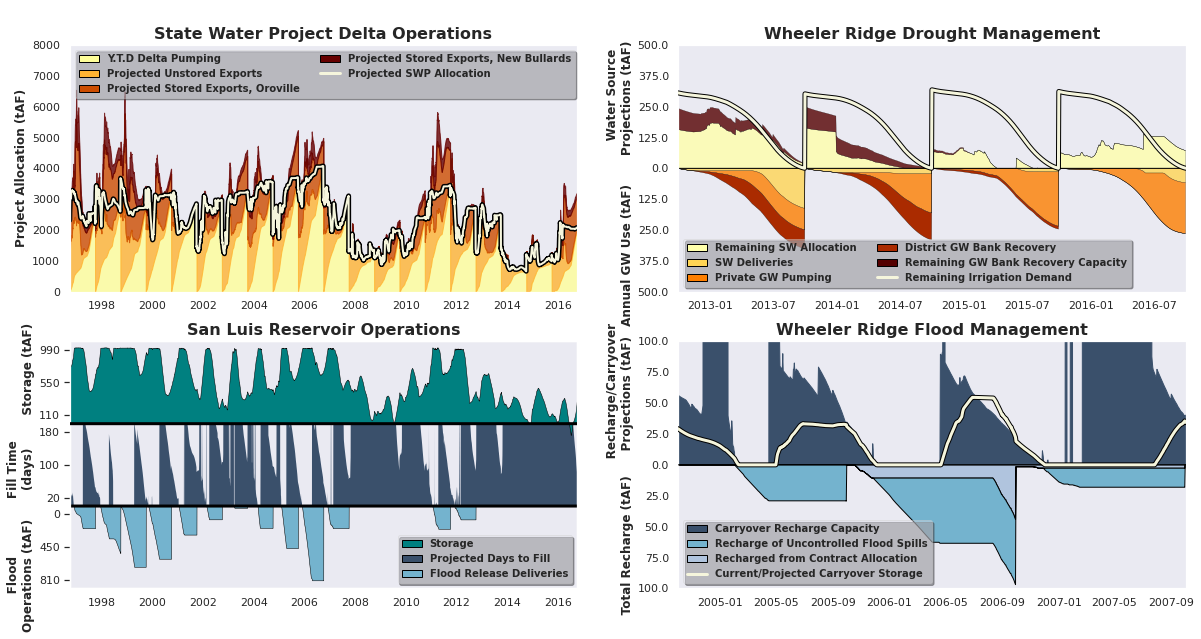

Time elapsed:  0:17:45.247506


In [9]:
#Plot 'states' for contracts, reservoirs, districts
reservoir_name = 'sanluisstate'
district_label = 'wheeler'
district_key = 'WRM'
plot_type = 'state_response'
district_private_labels = []
district_private_keys = []
print('State Response, ' + district_key)
##Uses the 'vaidation' files
validation.show_state_response(fig_folder, plot_type, reservoir_name, district_label, district_key, district_private_labels, district_private_keys, show_plot)
print('Time elapsed: ', datetime.now() - startTime)

Model Validation


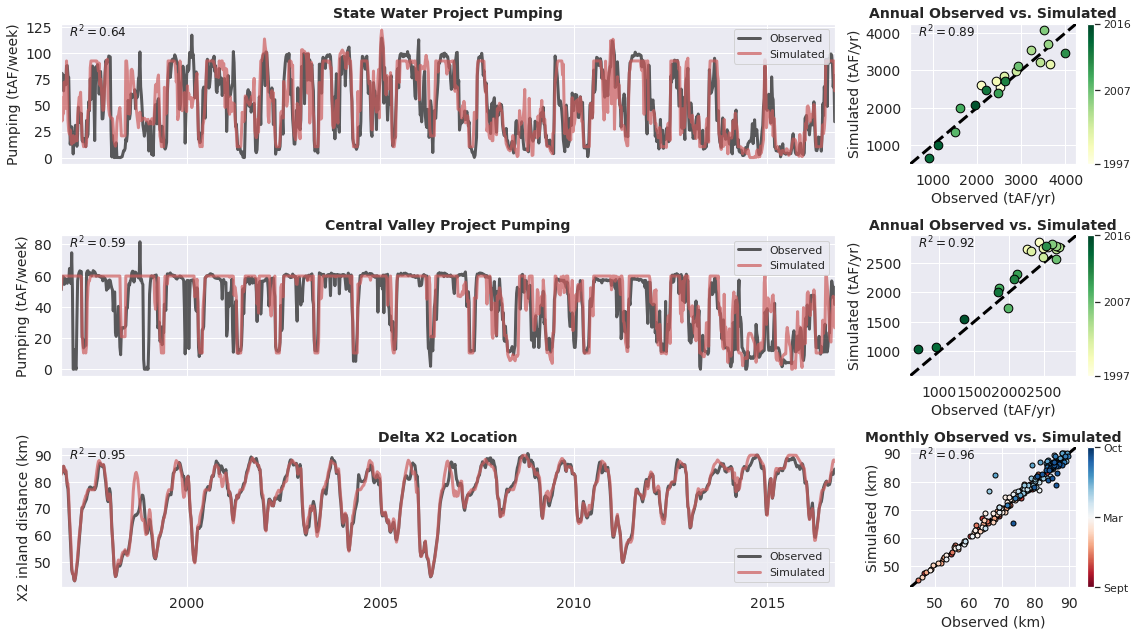

Time elapsed:  0:17:49.950365


In [10]:
##Plot validation between model & observations
print('Model Validation')
#delta pumping variables
plot_type = 'model_validation'
plot_name = 'delta'
use_scatter = True
validation.make_validation_timeseries(fig_folder, plot_type, plot_name, show_plot, use_scatter)
print('Time elapsed: ', datetime.now() - startTime)

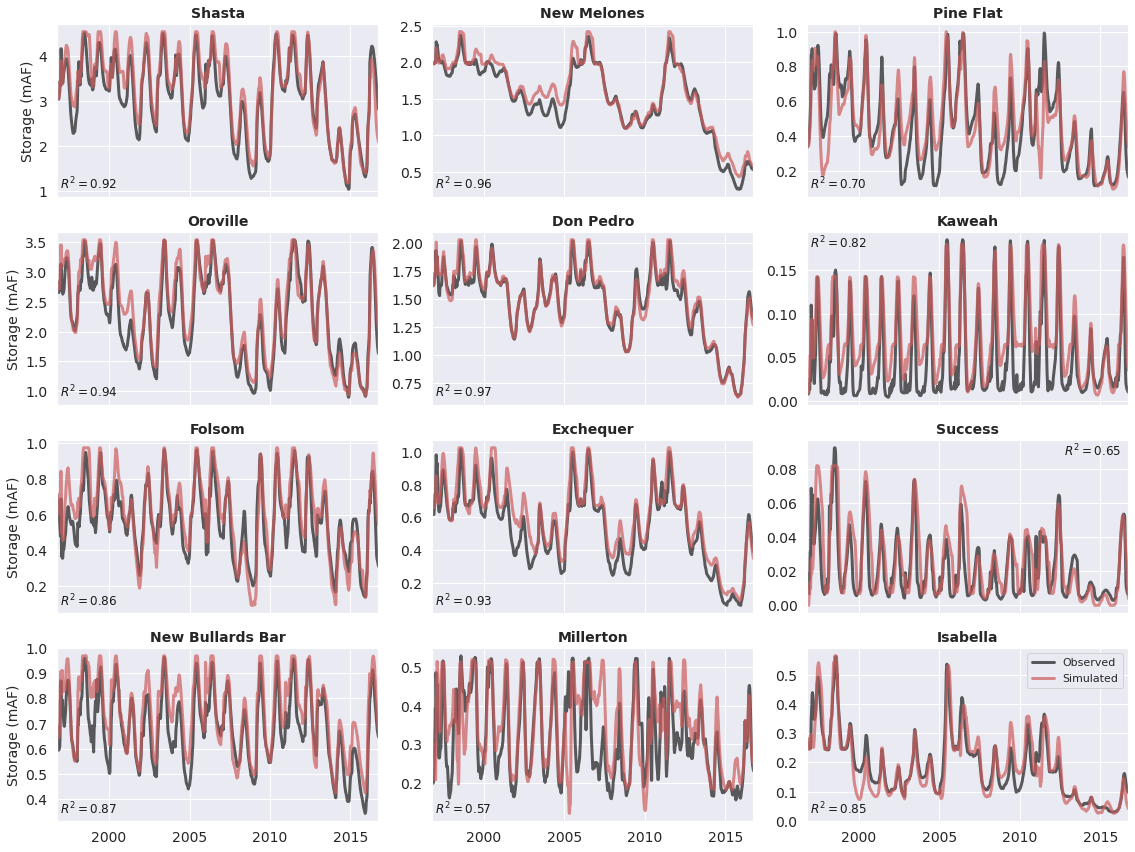

Time elapsed:  0:17:58.339519


In [11]:
#sierra reservoirs
plot_name = 'sierra'
use_scatter = False
num_cols = 3
validation.make_validation_timeseries(fig_folder, plot_type, plot_name, show_plot, use_scatter, num_cols)
print('Time elapsed: ', datetime.now() - startTime)

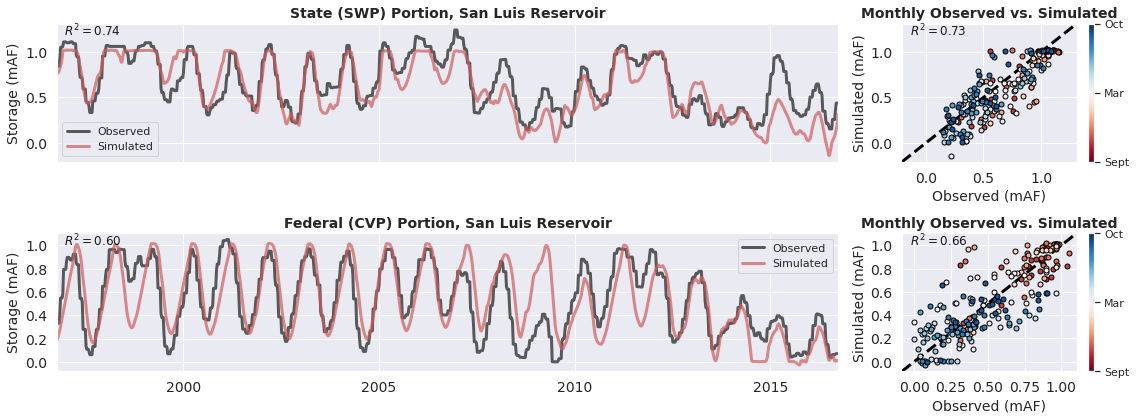

Time elapsed:  0:18:01.646161


In [12]:
#san luis reservoirs
plot_name = 'sanluis'
use_scatter = True
validation.make_validation_timeseries(fig_folder, plot_type, plot_name, show_plot, use_scatter)
print('Time elapsed: ', datetime.now() - startTime)

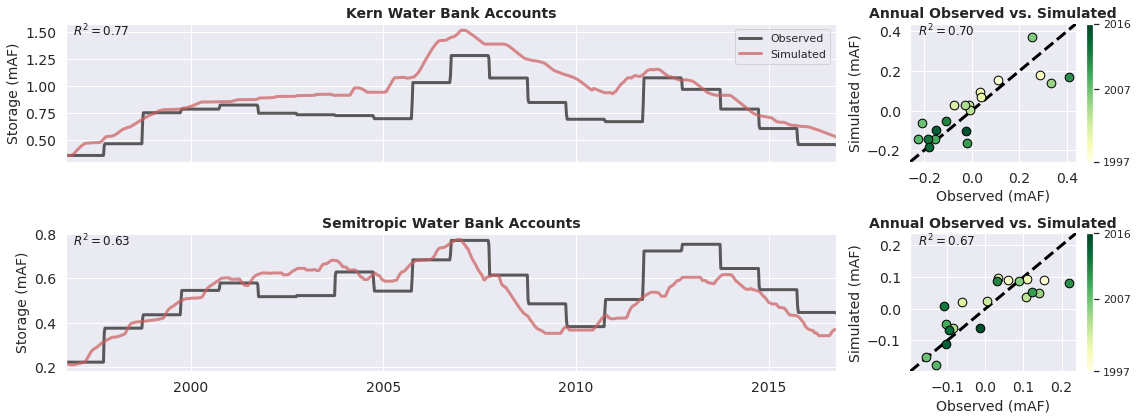

Time elapsed:  0:18:04.675646


In [13]:
#groundwater banks
plot_name = 'bank'
use_scatter = True
validation.make_validation_timeseries(fig_folder, plot_type, plot_name, show_plot, use_scatter)
print('Time elapsed: ', datetime.now() - startTime)

In [ ]:
#sankey diagrams - write figures for water 'flows' in each day, then write to GIF
plot_type = 'flow_diagram'
plot_name = 'tulare'
timesteps = 20000 #timesteps need to be greater than the snapshot range
snapshot_range = (14600, 14975)
simulation.plot_account_flows(sankeys_folder, plot_type, plot_name, timesteps, snapshot_range)	

**note: this^ did create figs, gif, but crashed kernel. I will look into it. Visualizing output below

In [8]:
simulation.make_gif(sankeys_folder + 'cali_sankey', '1946', 14601, 14933)
print('Time elapsed: ', datetime.now() - startTime)

Time elapsed:  0:10:26.552629


In [9]:
from IPython.display import HTML
HTML('<img src="results/baseline_wy2017/sankeys/cali_sankey1946.gif">')
print('Time elapsed: ', datetime.now() - startTime)

Time elapsed:  0:15:03.668563
